## 1. Salary Prediction according to Experience.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  36 non-null     float64
 1   Salary           35 non-null     float64
dtypes: float64(2)
memory usage: 708.0 bytes


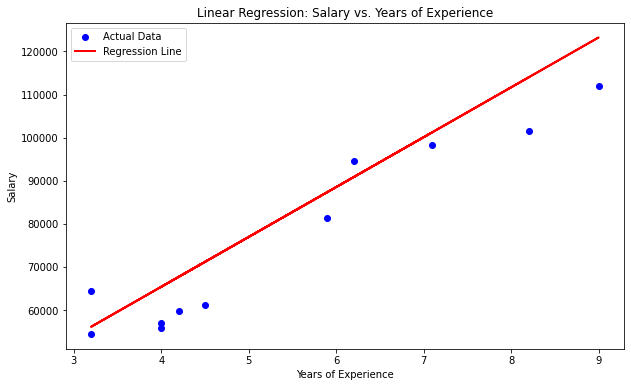


Mean Squared Error: 67193846.55620855

R-squared: 0.8414757489217368
Predicted Salary for 3 Year Experience : 53828.25216352839


In [46]:
import pandas as p
import matplotlib.pyplot as m
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

da=p.read_csv("C:\\Users\\reddy\\Desktop\\Data\\Salary_LR.csv")
da.info()
da.dropna(axis=0,inplace=True)

x=da['YearsExperience'].values.reshape(-1,1)
y=da['Salary']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

m.figure(figsize=(10, 6))
m.scatter(x_test, y_test, color='blue', label='Actual Data')
m.plot(x_test, y_pred, color='red', linewidth=2, label='Regression Line')
m.title('Linear Regression: Salary vs. Years of Experience')
m.xlabel('Years of Experience');m.ylabel('Salary')
m.legend();m.show()

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nMean Squared Error:", mse)
print("\nR-squared:", r2)

Expe= [[3]]  # Replace with the desired experience value
Sal = model.predict(Expe)
print(f"Predicted Salary for {Expe[0][0]} Year Experience : {Sal[0]}")

# 2. Marks Prediction according to Study Hours

time_study    0
Marks         0
dtype: int64


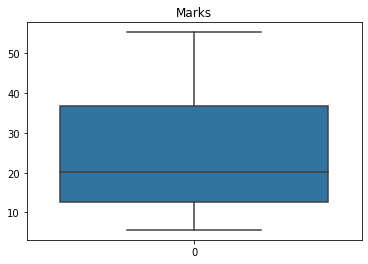

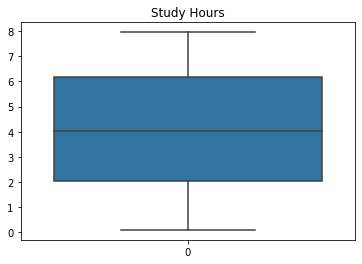

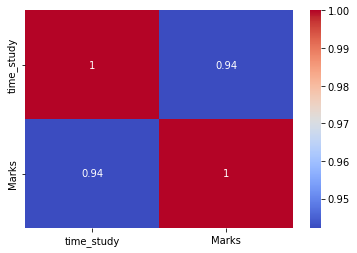

Mean Squared Error: 25.23674562363223
R-squared: 0.9040228286990537


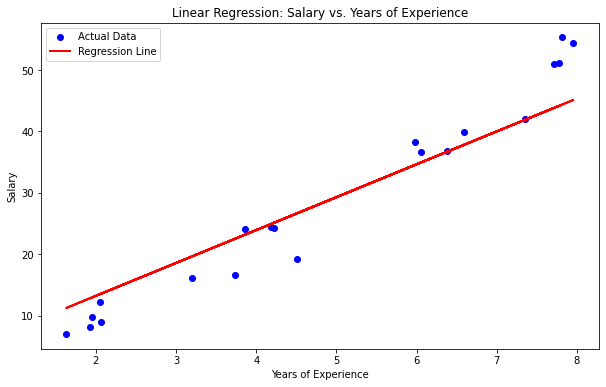

Predicted Marks for 20 Hours : 109.62199613197404


In [58]:
import pandas as p
import matplotlib.pyplot as m
import seaborn as s
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

da=p.read_csv("C:\\Users\\reddy\\Desktop\\Data\\Stud_marks.csv")
print(da.isna().sum())

s.boxplot(da['Marks']);m.title('Marks')
m.show()
s.boxplot(da['time_study']);m.title('Study Hours')
m.show()
s.heatmap(data=da.corr(), annot=True, cmap='coolwarm')
m.show()

X = da['time_study'].values.reshape(-1,1)
y = da['Marks']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

m.figure(figsize=(10, 6))
m.scatter(X_test, y_test, color='blue', label='Actual Data')
m.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
m.title('Linear Regression: Salary vs. Years of Experience')
m.xlabel('Years of Experience');m.ylabel('Salary')
m.legend();m.show()

Hours= [[20]]# Replace with the desired experience value
predicted_marks = model.predict(Hours)
print(f"Predicted Marks for {Hours[0][0]} Hours : {predicted_marks[0]}")

# 3. Boston housing price
### 3a. Prepocessing & Exploration

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.28

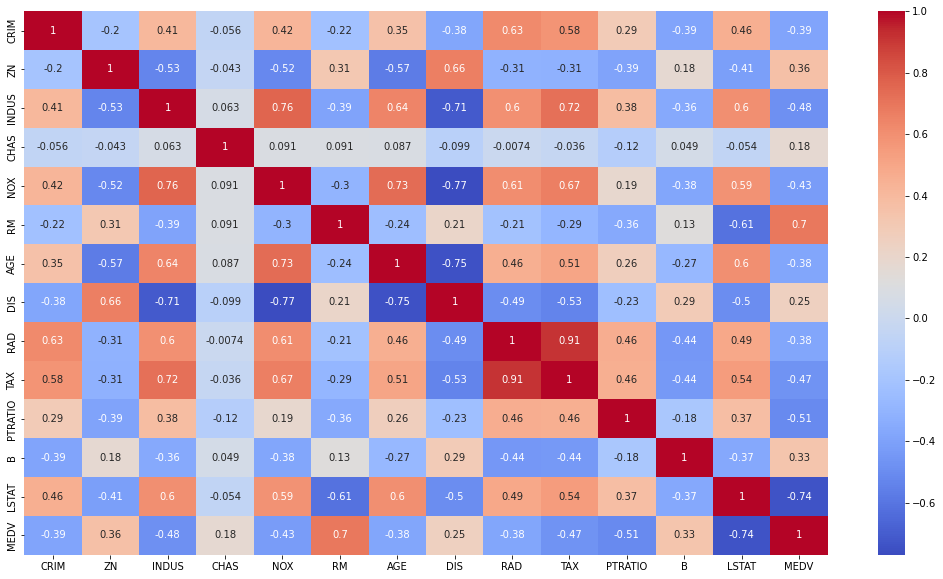

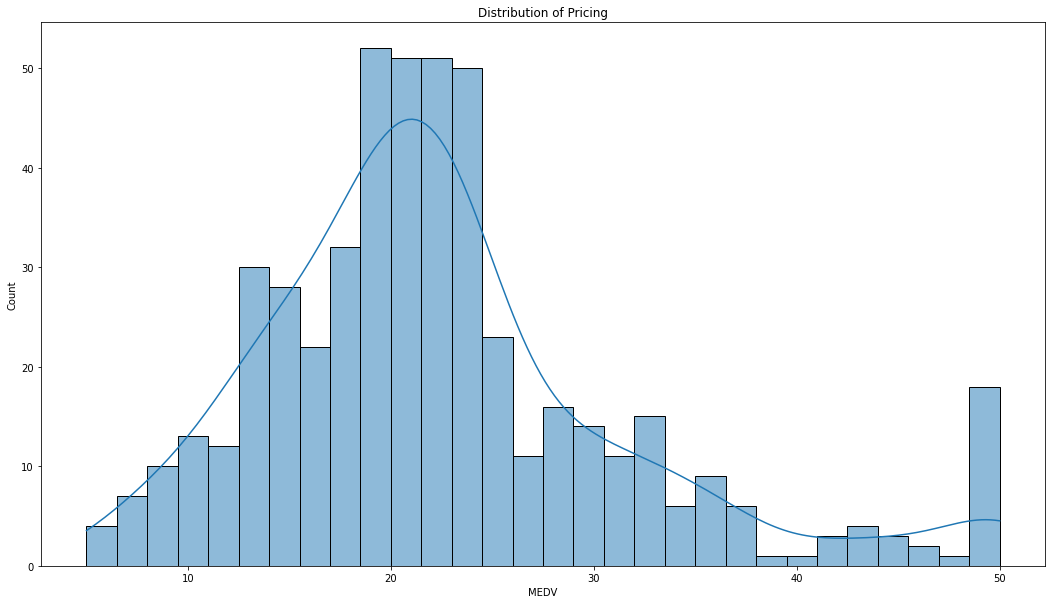

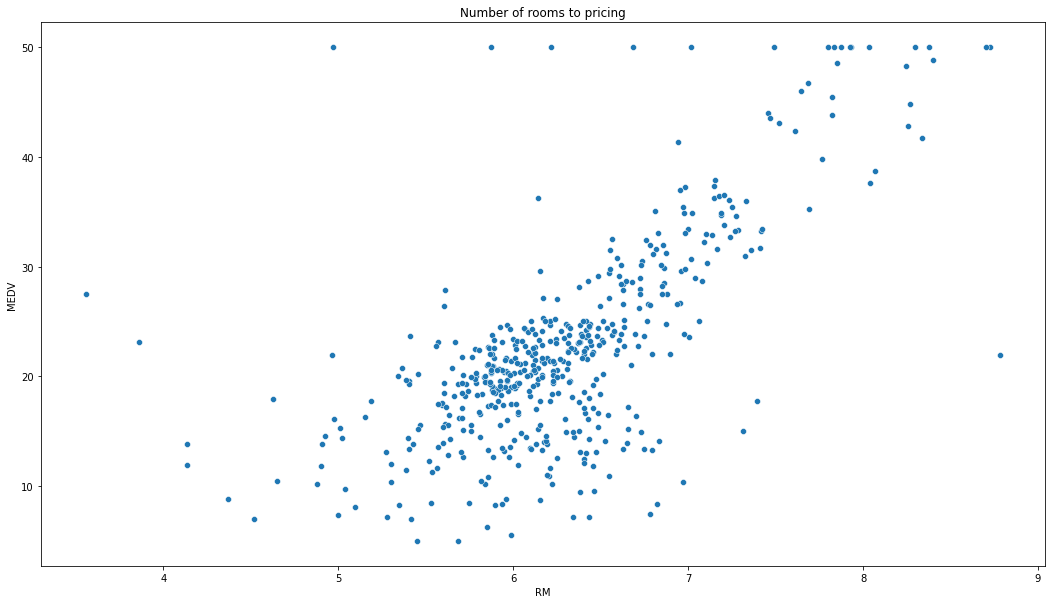

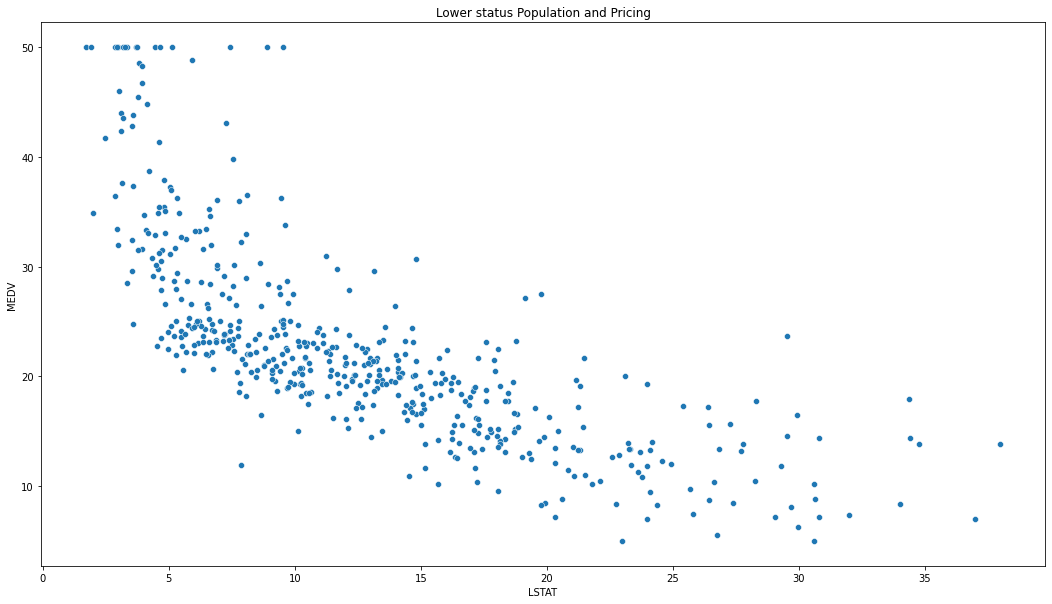

In [2]:
import pandas as p
import seaborn as s
import matplotlib.pyplot as m

da=p.read_csv("C:\\Users\\reddy\\Desktop\\Data\\boston.csv")
da.info()

print(da.describe())

m.figure(figsize=(18,10))
s.heatmap(data=da.corr(),annot=True,cmap='coolwarm')
m.show()

m.figure(figsize=(18,10))
s.histplot(data=da,x='MEDV',bins=30,kde=True)
m.title('Distribution of Pricing')
m.show()

m.figure(figsize=(18,10))
s.scatterplot(data=da,x='RM',y='MEDV')
m.title('Number of rooms to pricing')
m.show()

m.figure(figsize=(18,10))
s.scatterplot(data=da,x='LSTAT',y='MEDV')
m.title('Lower status Population and Pricing')
m.show()

#ULTRA_LEGENDS_PRO_MAX can uncomment this and understand the graph
# m.figure(figsize=(18,10))
# s.pairplot(data=da)
# m.show()

### 3b. Splitting

In [4]:
import numpy as n
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = da.drop('MEDV', axis=1)  
y = da['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Train set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

rmse = n.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)


Train set: (354, 13) (354,)
Test set: (152, 13) (152,)
Root Mean Squared Error: 4.638689926172827
R-squared: 0.7112260057484925


# 4. Cricket match result
###  4a.           Data Prepocessing 

In [ ]:
import pandas as p
da=p.read_csv("C:\\Users\\reddy\\Desktop\\Data\\matches.csv")
da.info()

#PRE_PROCESSING
miss=da.isna().sum()
print("\nMissing Values:\n",miss)

da.drop('umpire3', axis=1, inplace=True)
da.dropna(axis=0,inplace=True)
# da.drop('date',axis=1,inplace=True)

print("\nMissing Values:\n",da.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

### 4b.  Data Exploration

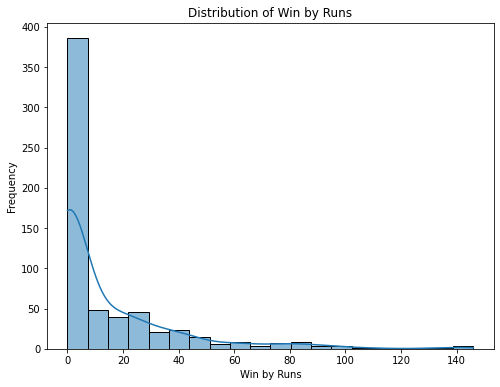

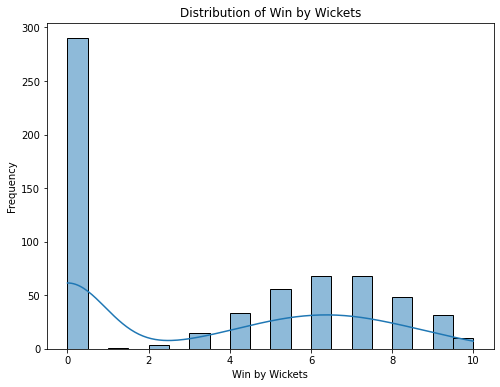

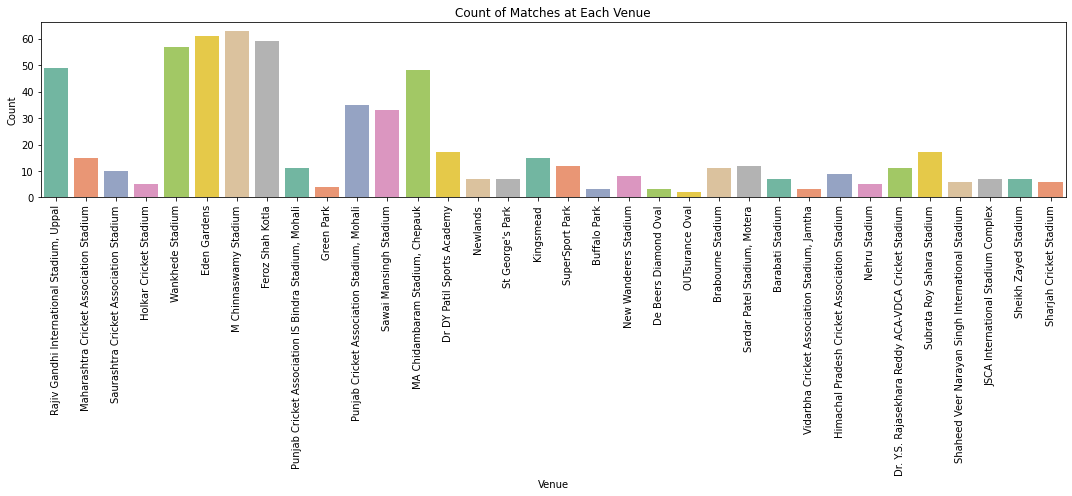

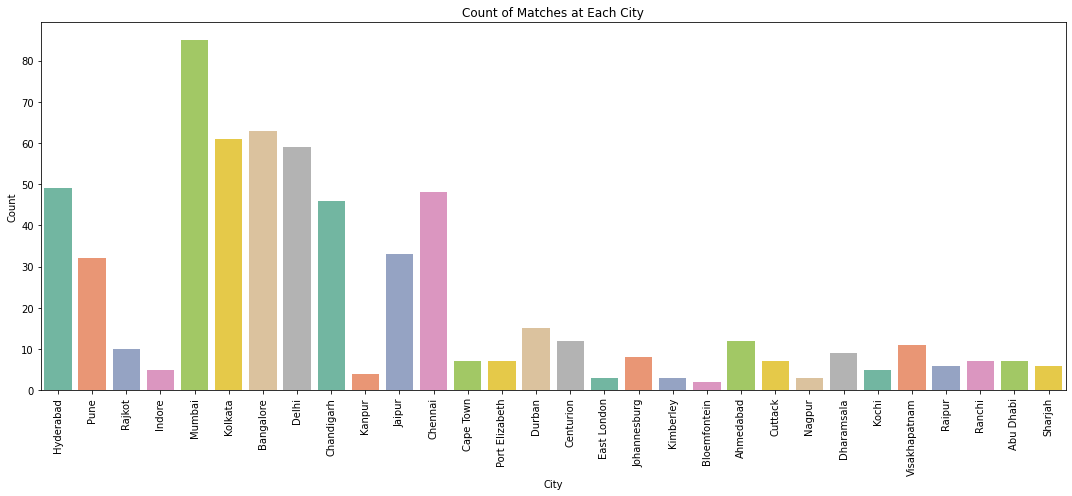

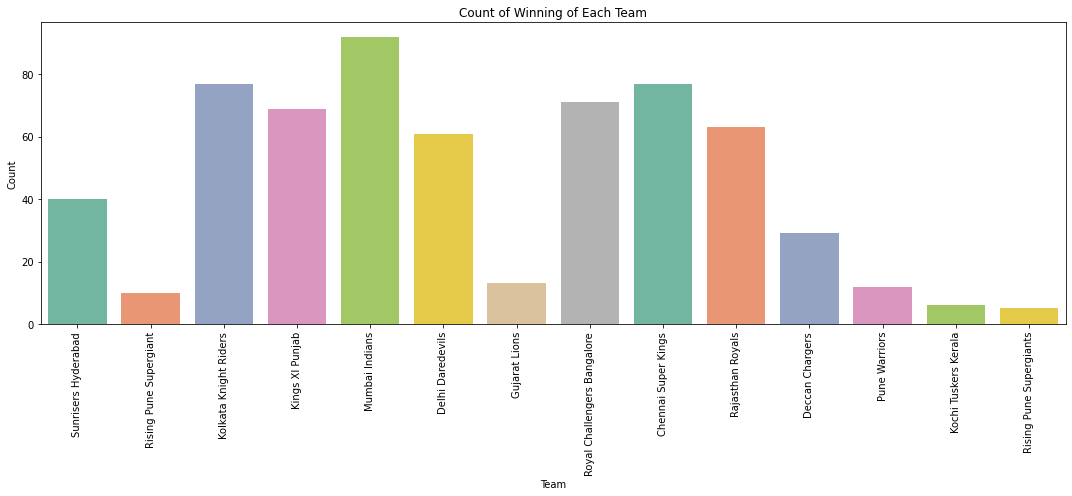

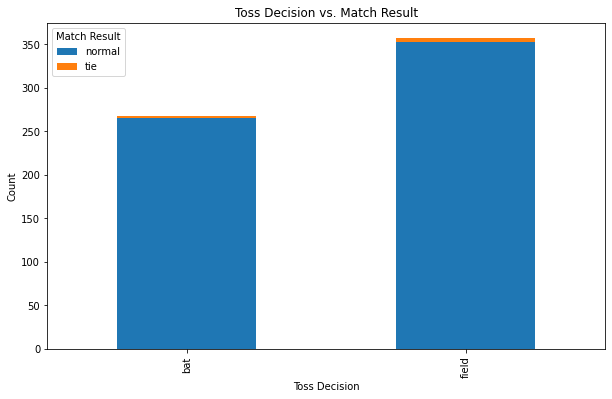

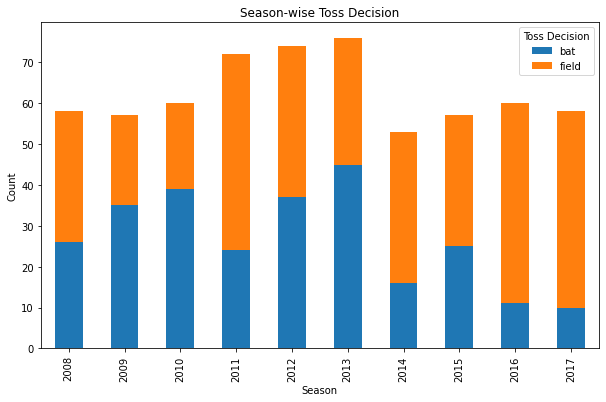

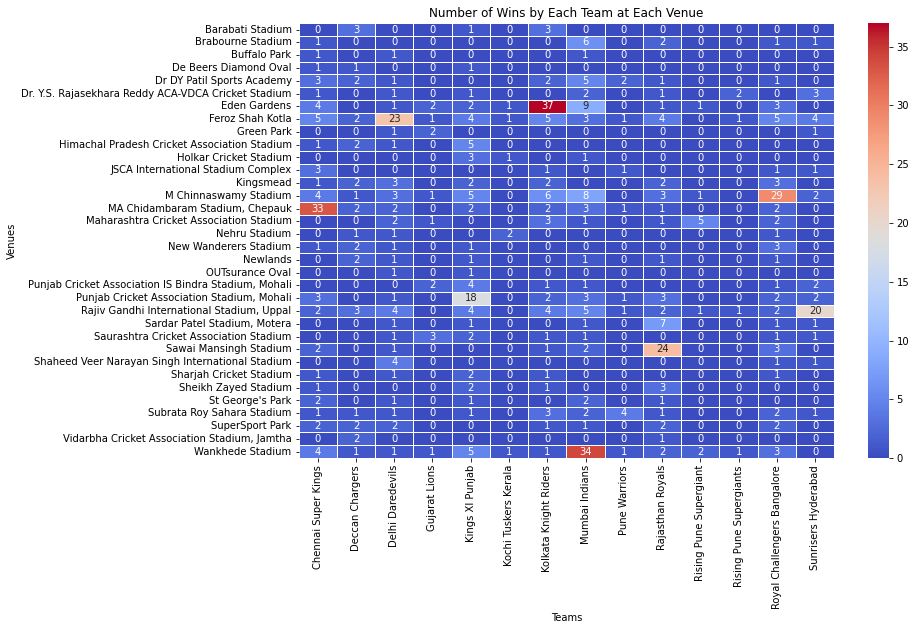

In [ ]:
import matplotlib.pyplot as m
import seaborn as s

# Function to create a histogram
def histo(da, col, title, xlabel):
    m.figure(figsize=(8, 6))
    s.histplot(da[col], bins=20, kde=True)
    m.title(title)
    m.xlabel(xlabel)
    m.ylabel('Frequency')
    m.show()

# Function to create a count plot
def count_plo(da, x, title, xlabel):
    m.figure(figsize=(15, 7))
    s.countplot(x=x, data=da, palette='Set2')
    m.title(title)
    m.xlabel(xlabel)
    m.ylabel('Count')
    m.xticks(rotation=90)
    m.tight_layout()
    m.show()

# Function to create a stacked bar chart
def sta_bar(da, x, y, title, xlabel, ylabel, legend_title=None):
    dp = da.groupby([x, y]).size().unstack()
    dp.plot(kind='bar', stacked=True, figsize=(10, 6))
    m.title(title)
    m.xlabel(xlabel)
    m.ylabel(ylabel)
    if legend_title:
        m.legend(title=legend_title)
    m.show()

#DATA_EXPLORATION
histo(da, 'win_by_runs', 'Distribution of Win by Runs', 'Win by Runs')
histo(da, 'win_by_wickets', 'Distribution of Win by Wickets', 'Win by Wickets')
count_plo(da, 'venue', 'Count of Matches at Each Venue', 'Venue')
count_plo(da, 'city', 'Count of Matches at Each City', 'City')
count_plo(da, 'winner', 'Count of Winning of Each Team', 'Team')
sta_bar(da, 'toss_decision', 'result', 'Toss Decision vs. Match Result', 'Toss Decision', 'Count', legend_title='Match Result')
sta_bar(da, 'season', 'toss_decision', 'Season-wise Toss Decision', 'Season', 'Count', legend_title='Toss Decision')

pr =da.pivot_table(index='venue', columns='winner', values='id', aggfunc='count', fill_value=0)
m.figure(figsize=(12, 8))
s.heatmap(pr, cmap='coolwarm', annot=True, fmt='d', cbar=True, linewidths=0.5)
m.title('Number of Wins by Each Team at Each Venue')
m.xlabel('Teams')
m.ylabel('Venues')
m.xticks(rotation=90) 
m.show()

### 4c. Spliting

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#Transformation
categorical_columns = ['city', 'team1', 'team2', 'toss_winner', 'toss_decision', 'result', 'player_of_match', 'venue', 'umpire1', 'umpire2','winner','date']
label_encoders = {}

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    da[column] = label_encoders[column].fit_transform(da[column])

X = da.drop('winner', axis=1)  
y = da['winner']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Train set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

Train set: (437, 16) (437,)
Test set: (188, 16) (188,)


# 5. Performance of a cricket player
### 5a. Prepocessing

In [ ]:
import pandas as p
da=p.read_csv("C:\\Users\\reddy\\Desktop\\Data\\Ms_Dhoni.csv")
da.info()

#PRE_PROCESSING
miss=da.isna().sum()
print("\nMissing Values:\n",miss)
da.dropna(inplace=True)
print("\nMissing Values:\n",da.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           15 non-null     float64
 1   Matches        15 non-null     float64
 2   Innings        15 non-null     float64
 3   N.O.           15 non-null     float64
 4   Runs           15 non-null     float64
 5   Highest Score  15 non-null     float64
 6   Average        15 non-null     float64
 7   Strike Rate    15 non-null     float64
 8   100            15 non-null     float64
 9   50             15 non-null     float64
 10  Fours          15 non-null     float64
 11  Sixes          15 non-null     float64
 12  Catches Taken  15 non-null     float64
 13  Stumpings      15 non-null     float64
dtypes: float64(14)
memory usage: 1.9 KB

Missing Values:
 Year             1
Matches          1
Innings          1
N.O.             1
Runs             1
Highest Score    1
Average          1
S

### 5b. Data Exploration

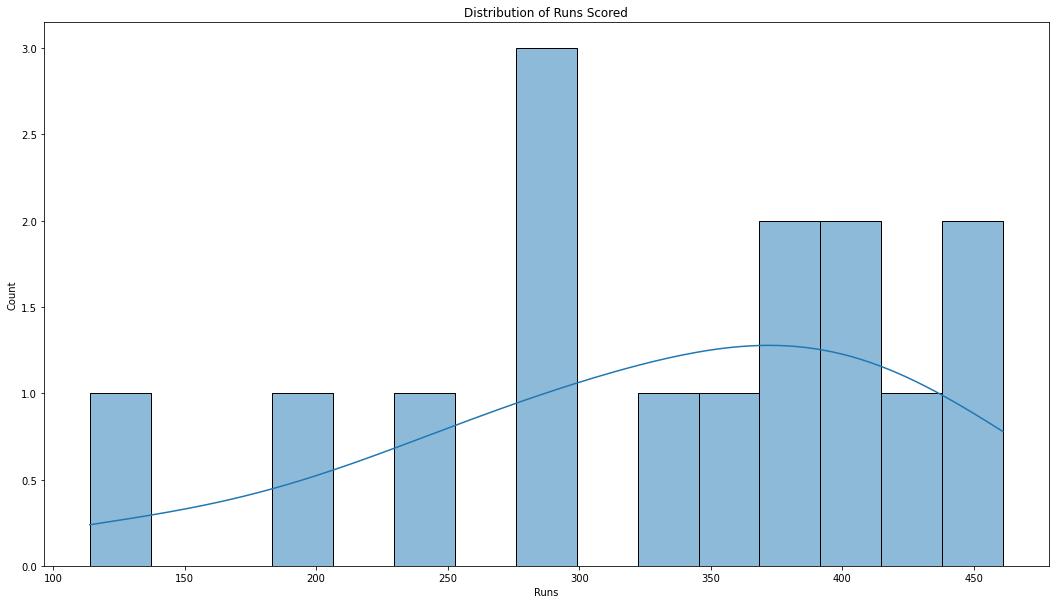

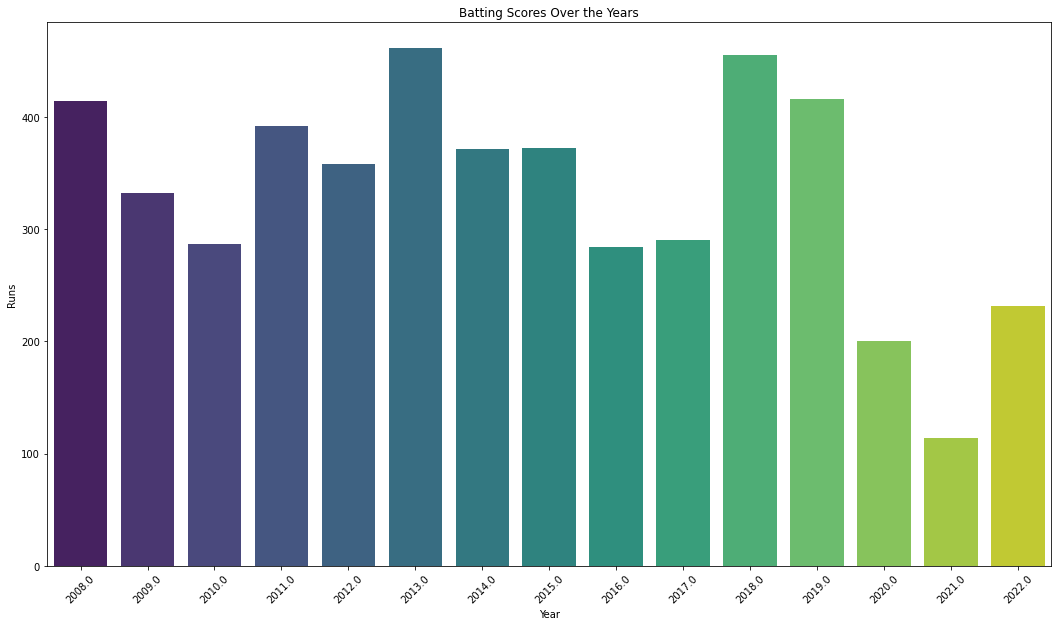

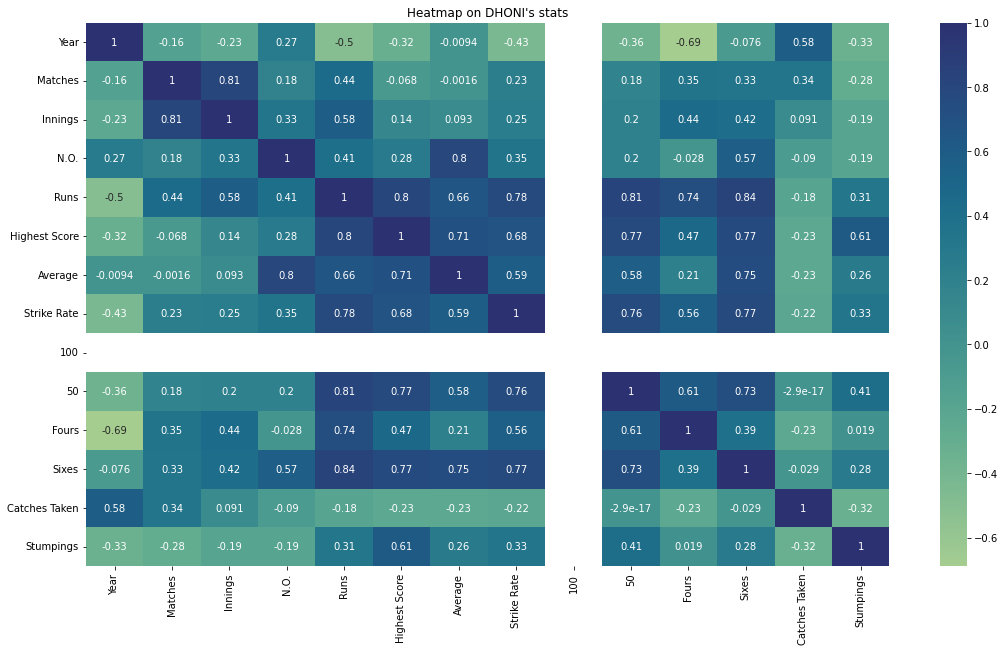

In [ ]:
import matplotlib.pyplot as m
import seaborn as s

m.figure(figsize=(18,10))
s.histplot(da['Runs'], bins=15, kde=True)
m.title('Distribution of Runs Scored')
m.show()

m.figure(figsize=(18,10))
s.barplot(data=da,x='Year',y='Runs',palette='viridis')
m.title('Batting Scores Over the Years')
m.xlabel('Year');m.ylabel('Runs')
m.xticks(rotation=45)
m.show()

m.figure(figsize=(18,10))
s.heatmap(data=da.corr(),annot=True,cmap='crest')
m.title("Heatmap on DHONI's stats")
m.show()

### 5c. Spliting

In [ ]:
from sklearn.model_selection import train_test_split

X = da.drop('Average', axis=1)  
y = da['Average']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Train set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

Train set: (10, 13) (10,)
Test set: (5, 13) (5,)


# 6. Crop yield
### 6a. Preprocessing

In [2]:
import pandas as p
da=p.read_csv("C:\\Users\\reddy\\Desktop\\Data\\crop_production.csv")
da.info()

#PRE_PROCESSING
miss=da.isna().sum()
print("\nMissing Values:\n",miss)
da.dropna(inplace=True)
print("\nMissing Values:\n",da.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB

Missing Values:
 State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

Missing Values:
 State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64


### 6b. Data Exploration

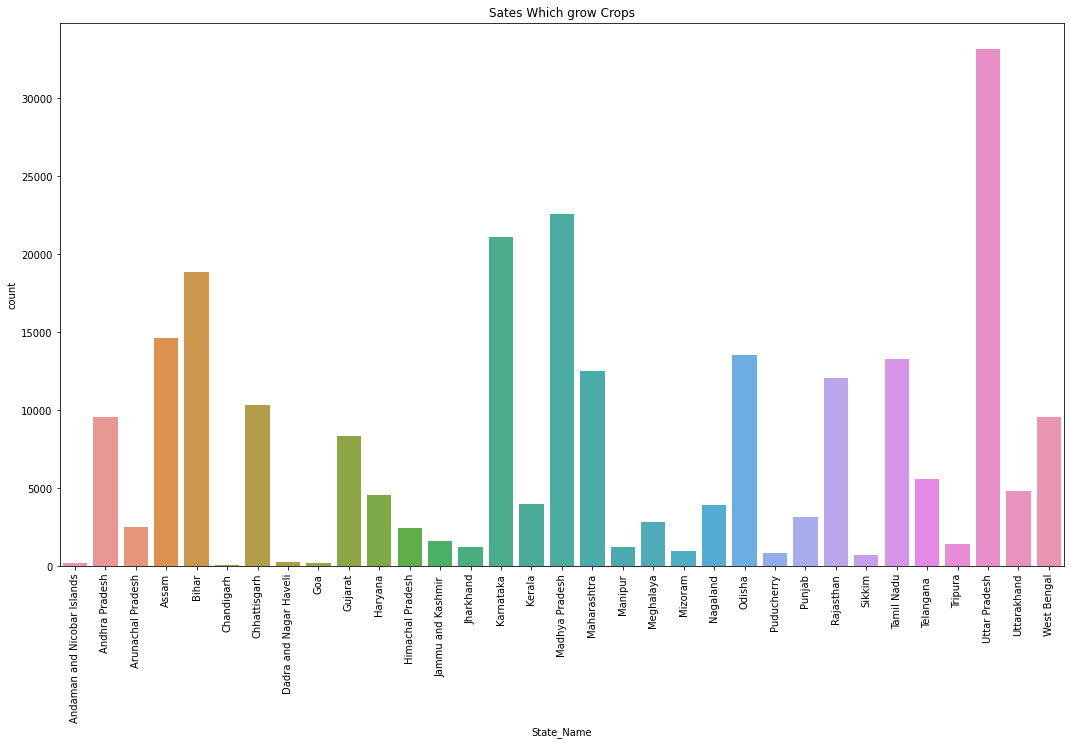

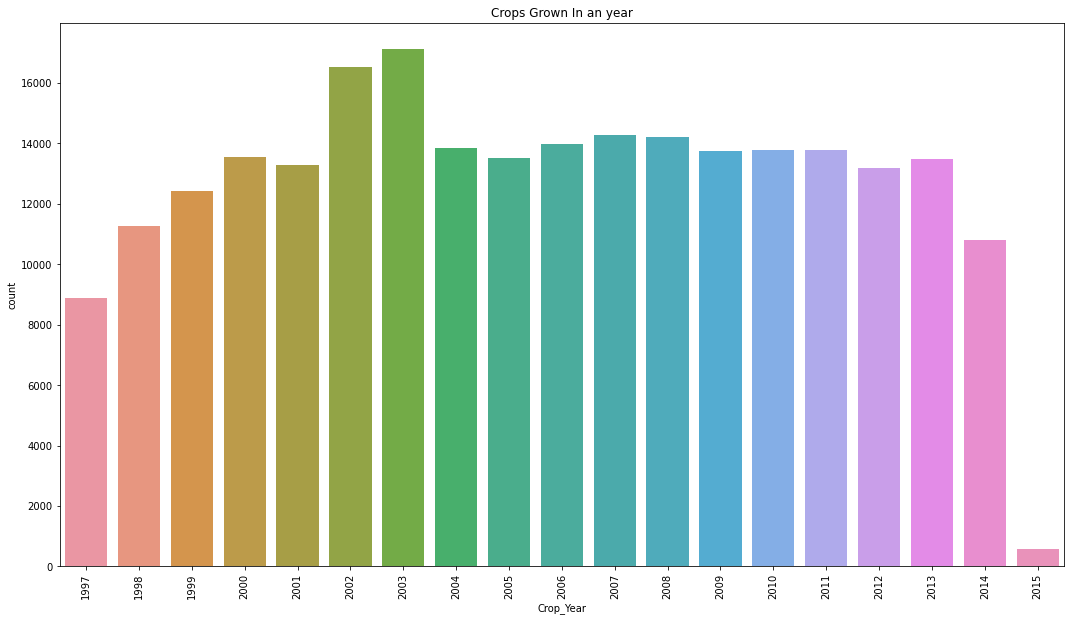

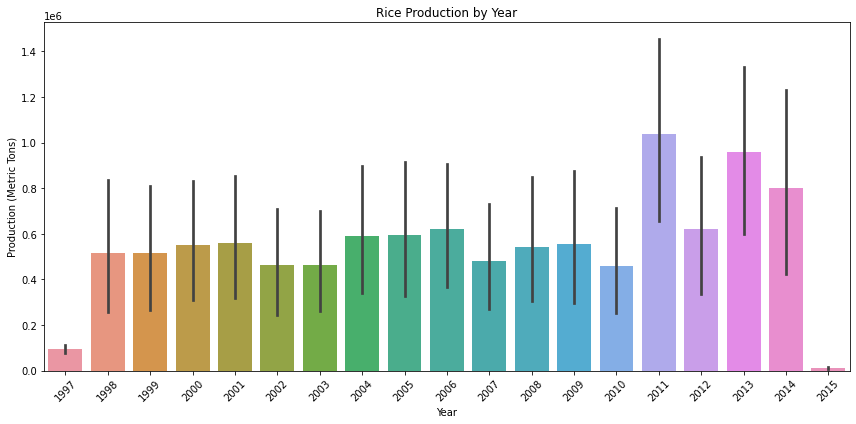

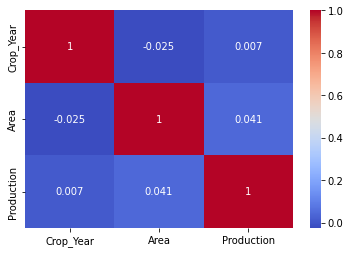

In [26]:
import matplotlib.pyplot as m
import seaborn as s

m.figure(figsize=(18,10))
s.countplot(data=da, x='State_Name')
m.title("Sates Which grow Crops")
m.xticks(rotation=90)
m.show()

m.figure(figsize=(18,10))
s.countplot(data=da,x='Crop_Year')
m.title('Crops Grown In an year')
m.xticks(rotation=90)
m.show()

m.figure(figsize=(12, 6))
s.barplot(x=da['Crop_Year'], y=da['Production'],data=da)
m.title('Rice Production by Year')
m.xlabel('Year')
m.ylabel('Production (Metric Tons)')
m.xticks(rotation=45)
m.tight_layout()
m.show()

sn=da.select_dtypes(exclude=['object'])
s.heatmap(data=sn.corr(),annot=True,cmap='coolwarm')
m.show()

### 6c. Spliting

In [30]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#Transformation
categorical_columns = ['State_Name','District_Name','Season','Crop']
label_encoders = {}

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    da[column] = label_encoders[column].fit_transform(da[column])

X = da.drop('Production', axis=1)  
y = da['Production']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Train set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

Train set: (169652, 6) (169652,)
Test set: (72709, 6) (72709,)
